# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [2]:
import pandas as pd

# load the training dataset
url= 'https://github.com/MicrosoftDocs/ml-basics/raw/master/challenges/data/wine.csv'
data = pd.read_csv(url)
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.860,3.02,312,1
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.930,3.05,564,1
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.380,3.12,278,1
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.040,3.47,920,0
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.910,3.00,1035,0
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718,1
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.450,2.23,355,1
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472,1
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.160,3.14,714,1


**The Wine Variety** column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [21]:
data_classes= ['Variety A', 'Variety B', 'Variety C']
print(data.columns[0:13].values, 'WineVariety')
for index, row in data.sample(20).iterrows():
  print('[', row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], int(row[13]), ']', data_classes[int(row[13])])


['Alcohol' 'Malic_acid' 'Ash' 'Alcalinity' 'Magnesium' 'Phenols'
 'Flavanoids' 'Nonflavanoids' 'Proanthocyanins' 'Color_intensity' 'Hue'
 'OD280_315_of_diluted_wines' 'Proline'] WineVariety
[ 12.72 1.81 2.2 18.8 86.0 2.2 2.53 0.26 1.77 3.9 1.16 3.14 714.0 1 ] Variety B
[ 12.0 0.92 2.0 19.0 86.0 2.42 2.26 0.3 1.43 2.5 1.38 3.12 278.0 1 ] Variety B
[ 12.29 1.41 1.98 16.0 85.0 2.55 2.5 0.29 1.77 2.9 1.23 2.74 428.0 1 ] Variety B
[ 13.84 4.12 2.38 19.5 89.0 1.8 0.83 0.48 1.56 9.01 0.57 1.64 480.0 2 ] Variety C
[ 13.48 1.67 2.64 22.5 89.0 2.6 1.1 0.52 2.29 11.75 0.57 1.78 620.0 2 ] Variety C
[ 13.34 0.94 2.36 17.0 110.0 2.53 1.3 0.55 0.42 3.17 1.02 1.93 750.0 1 ] Variety B
[ 13.45 3.7 2.6 23.0 111.0 1.7 0.92 0.43 1.46 10.68 0.85 1.56 695.0 2 ] Variety C
[ 11.76 2.68 2.92 20.0 103.0 1.75 2.03 0.6 1.05 3.8 1.23 2.5 607.0 1 ] Variety B
[ 12.21 1.19 1.75 16.8 151.0 1.85 1.28 0.14 2.5 2.85 1.28 3.07 718.0 1 ] Variety B
[ 11.82 1.72 1.88 19.5 86.0 2.5 1.64 0.37 1.42 2.06 0.94 2.44 415.0 1 ] Varie

Now that we know what the features and labels in the data represent, let's explore the dataset. First, let's see if there are any missing (null) values.

In [22]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

Let's explore how the features relate to the label by creating some box charts

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

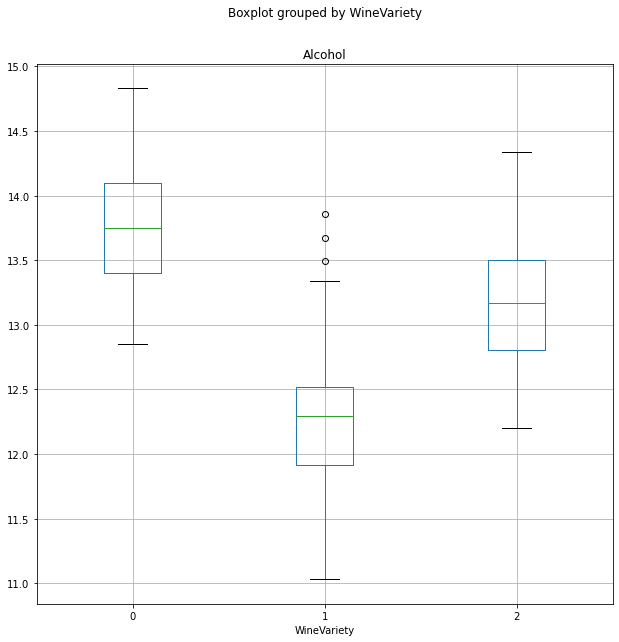

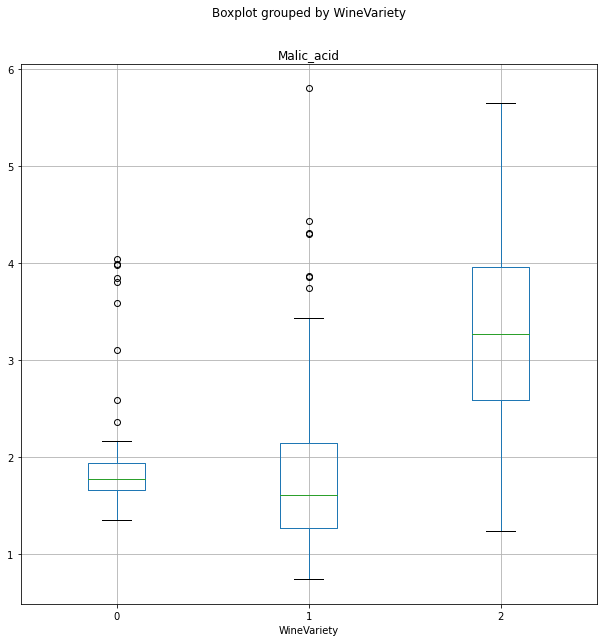

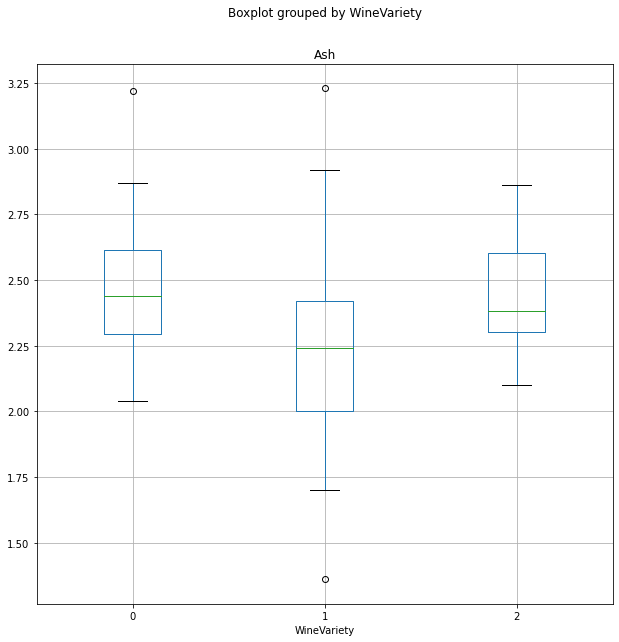

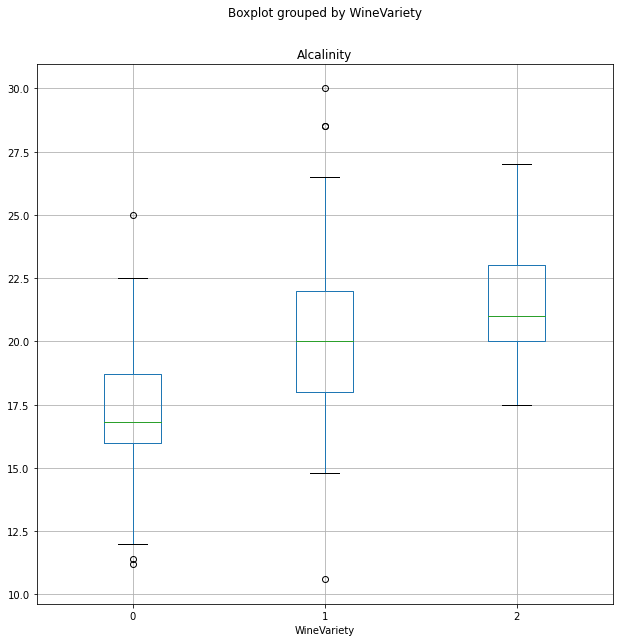

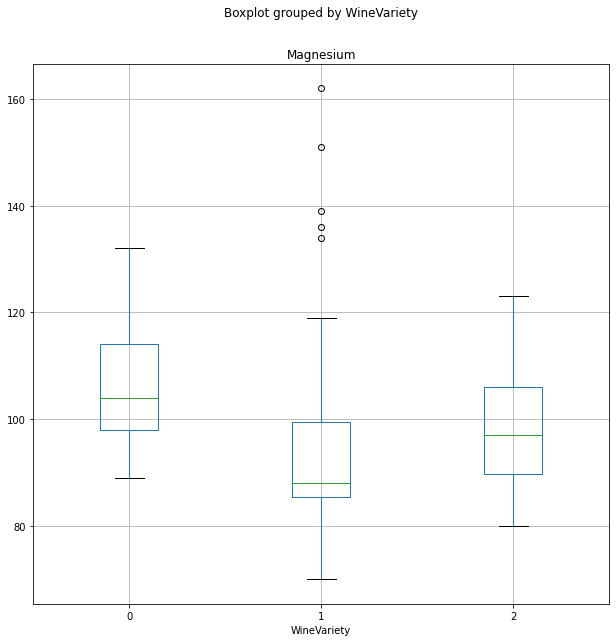

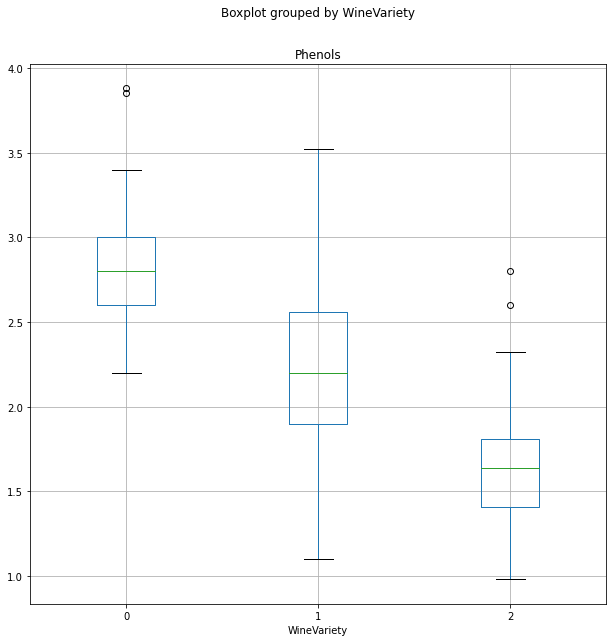

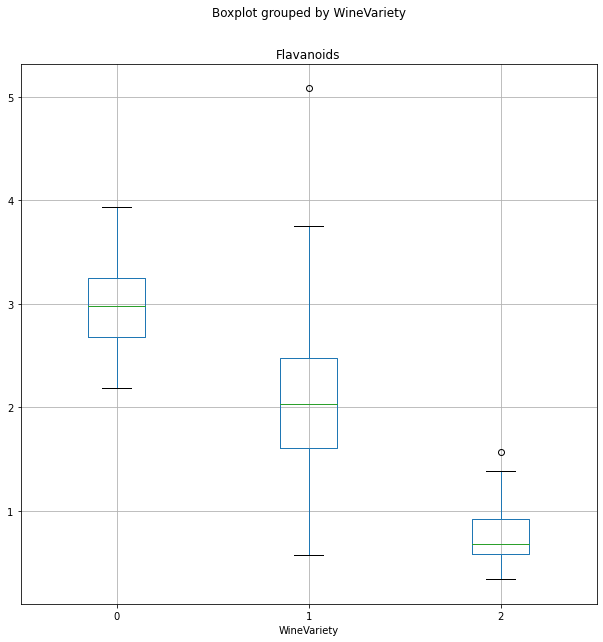

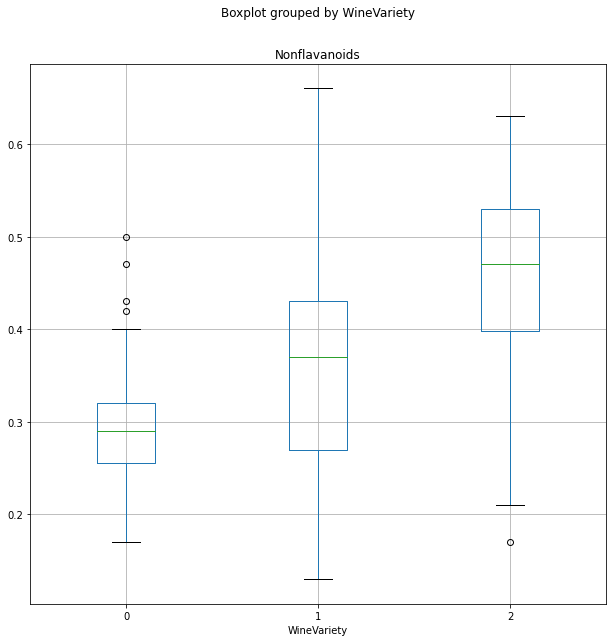

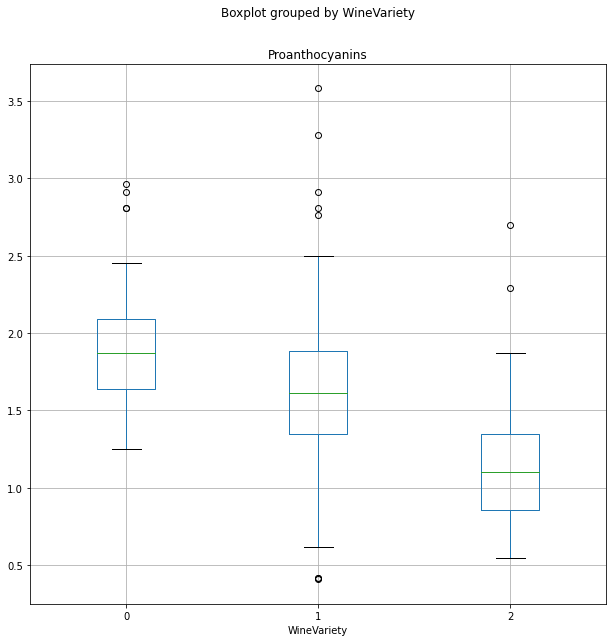

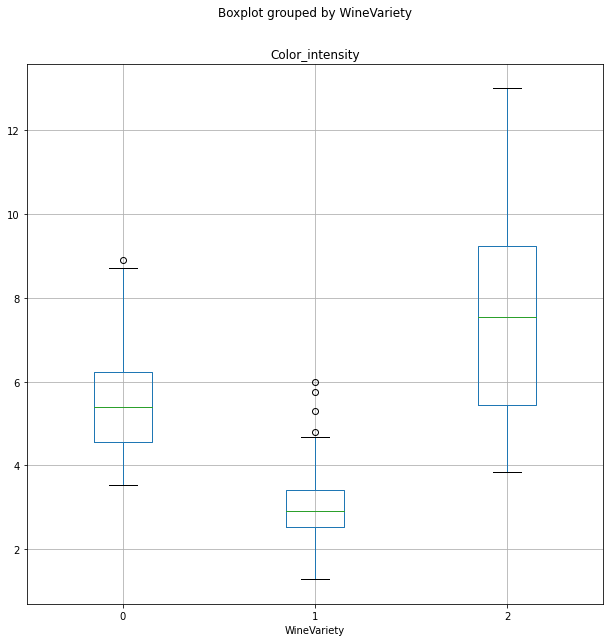

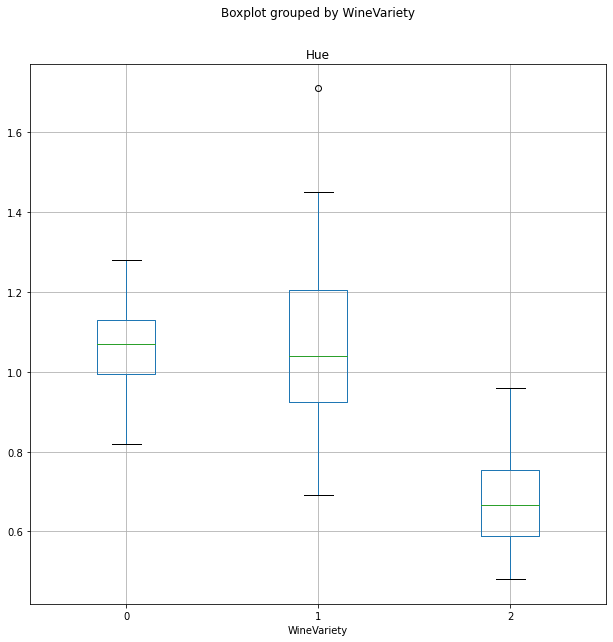

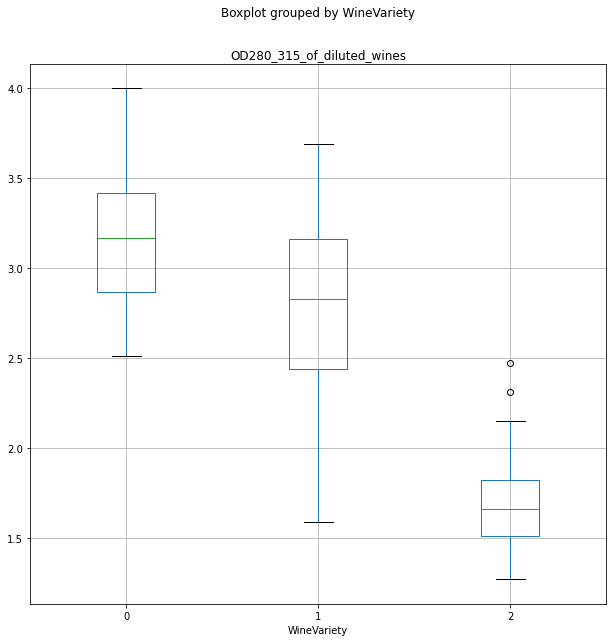

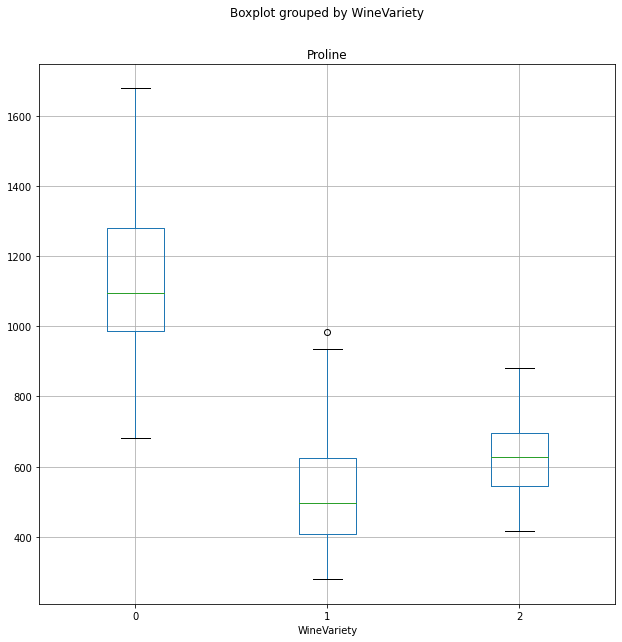

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

data_features= ['Alcohol',	'Malic_acid',	'Ash',	'Alcalinity',	'Magnesium',	'Phenols',	'Flavanoids',	'Nonflavanoids',	'Proanthocyanins',	'Color_intensity',	'Hue',	'OD280_315_of_diluted_wines',	'Proline'	]
data_label= 'WineVariety'
for col in data_features:
  data.boxplot(column=col, by=data_label, figsize=(10,10))
  plt.title(col)
plt.show()


**Prepare the data**

In [31]:
from sklearn.model_selection import train_test_split

#seperate features and labels
data_X, data_y= data[data_features].values, data[data_label].values

#split the data 70%-30% into training and test set
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(data_X, data_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0)
print('Training Set: %d, Test Set: %d \n'%(x_data_train.shape[0], x_data_test.shape[0]))



Training Set: 124, Test Set: 54 



## Train and evaluate a model

**Preprocess data in a pipeline**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_data_train, y_data_train)
print (multi_model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


## Evaluate The Model

Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9855072463768115
Overall Recall: 0.9743589743589745


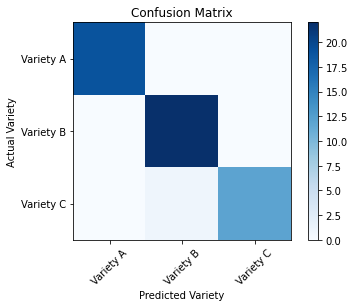

In [40]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Get predictions from test data
data_predictions = multi_model.predict(x_data_test)


# Overall metrics
print("Overall Accuracy:",accuracy_score(y_data_test, data_predictions))
print("Overall Precision:",precision_score(y_data_test, data_predictions, average='macro'))
print("Overall Recall:",recall_score(y_data_test, data_predictions, average='macro'))


# Confusion matrix
cm = confusion_matrix(y_data_test, data_predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

Average AUC: 1.0


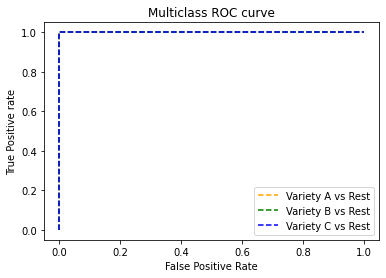

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = multi_model.predict_proba(x_data_test)

auc = roc_auc_score(y_data_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_data_test, probabilities[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [44]:
import joblib

filename = './winevariety.pkl'
joblib.dump(multi_model, filename)

multi_model = joblib.load(filename)

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

data_predictions = multi_model.predict(x_new)

for prediction in data_predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
